In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.metrics import classification_report, confusion_matrix

In [47]:
class KMeans:
    def __init__(self, n_clusters=2, max_iters = 30, tol= 1e-4):
        self.n_clusters = n_clusters
        self.tol = tol
        self.centroids = None
        self.labels = None
        self.max_iters= max_iters

    def fit(self, X):
        idx = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        self.centroids = X[idx]

        for _ in range(self.max_iters):
            distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
            self.labels = np.argmin(distances, axis = 1)
            new_centroids = np.array([X[self.labels == i].mean(axis=0) for i in range(self.n_clusters)])

            if np.all(np.abs(new_centroids-self.centroids) <self.tol):
                break

            self.centroids = new_centroids
    
    def predict(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis = 1)



In [50]:
X, y_true = make_blobs(n_samples=300, centers=5, cluster_std=0.60, random_state=45)

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_pred = kmeans.predict(X)

def relabel_clusters(true_labels, predicted_labels):
    cm = confusion_matrix(true_labels, predicted_labels)
    relabeling = np.argmax(cm, axis = 1)
    new_predicted_labels = np.array([relabeling[label] for label in predicted_labels])
    return new_predicted_labels

y_pred = relabel_clusters(true_labels=y_true, predicted_labels=y_pred)

report = classification_report(y_true=y_true, y_pred=y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        60
           2       0.50      1.00      0.67        60
           3       1.00      1.00      1.00        60
           4       0.00      0.00      0.00        60

    accuracy                           0.80       300
   macro avg       0.70      0.80      0.73       300
weighted avg       0.70      0.80      0.73       300



c:\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


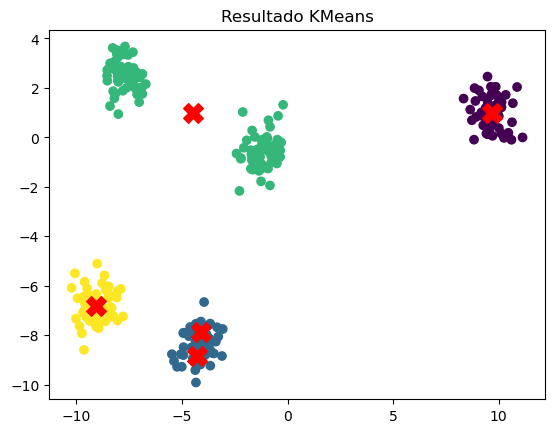

In [51]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap="viridis")
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], s=200, c="red", marker="X")
plt.title("Resultado KMeans")
plt.show()
